19M2100: CAMDOM TAGNE MARIE-NOELLE

19M2215: MEKATE FOGUE GARLY CATHY

19M2361: SIMO NOUMSI MARTHE BLANCHE

19M2348: NGAH ABANDA STEVE JORDAN





GENERER LES JEUX DE DONNEES AVEC PYTHON

DONNEES METEOROLOGIQUES ARTIFICIELLES POUR DES VILLES ALLEMANDES

In [ ]:
#Importation des bibliothèques
import numpy as np 
import pandas as pd

In [ ]:
cities = ['Berlin', 'Frankfurt', 'Hamburg', 'Nuremberg', 'Munich', 'Stuttgart', 'Hanover', 'Saarbruecken', 'Cologne', 'Constance', 'Freiburg', 'Karlsruhe'] 
n = len(cities) 
data = {'Temperature': np.random.normal(24, 3, n), 
        'Humidity': np.random.normal(78, 2.5, n), 
        'Wind': np.random.normal(15, 4, n)
       } 
df = pd.DataFrame(data=data, index=cities) 
df

,Temperature,Humidity,Wind
Berlin,21.829694,74.315483,6.053533
Frankfurt,25.012416,75.823605,15.478475
Hamburg,25.548870,77.075705,15.059012
Nuremberg,23.334466,78.737250,7.806853
Munich,22.950388,77.150870,14.718916
Stuttgart,24.650968,76.039760,19.216390
Hanover,24.112045,75.939001,23.679763
Saarbruecken,25.208530,73.098523,15.334618
Cologne,24.057280,76.192974,15.184349
Constance,27.088265,80.406526,10.920811


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from scipy.stats import truncnorm 
def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int): 
    return truncnorm( (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd) 
def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100): 
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp) 
    return res.rvs(num) 
def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100): 
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp) 
    return res.rvs(num).astype(np.uint8)

# nombre d'item pour chaque classe de fleur:
number_of_items_per_class = [190, 205, 230, 170] 
flowers = {}
# flos Pythonem: 
number_of_items = number_of_items_per_class[0] 
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256, num=number_of_items) 
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127, num=number_of_items) 
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20, num=number_of_items) 
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2, num=number_of_items) 
data = np.column_stack((reds, greens, blues, calyx_dia)) 
flowers["flos_pythonem"] = data 

# flos Java: 
number_of_items = number_of_items_per_class[1] 
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256, num=number_of_items) 
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127, num=number_of_items) 
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20, num=number_of_items) 
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5, num=number_of_items) 
data = np.column_stack((reds, greens, blues, calyx_dia)) 
flowers["flos_java"] = data 

# flos Margarita:
number_of_items = number_of_items_per_class[2] 
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238, num=number_of_items) 
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120, num=number_of_items) 
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12, num=number_of_items) 
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4, num=number_of_items) 
data = np.column_stack((reds, greens, blues, calyx_dia)) 
flowers["flos_margarita"] = data

# flos artificialis: 
number_of_items = number_of_items_per_class[3] 
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255, num=number_of_items) 
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255, num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112, num=number_of_items) 
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5, num=number_of_items) 
data = np.column_stack((reds, greens, blues, calyx_dia)) 
flowers["flos_artificialis"] = data
# concatenation
data = np.concatenate((flowers["flos_pythonem"], flowers["flos_java"], flowers["flos_margarita"], flowers["flos_artificialis"] ), axis=0)
# donnons des étiquettes 
target = np.zeros(sum(number_of_items_per_class)) # 4 fleurs 
previous_end = 0 
for i in range(1, 5): 
    num = number_of_items_per_class[i-1] 
    beg = previous_end 
    target[beg: beg + num] += i 
    previous_end = beg + num 
    
conc_data = np.concatenate((data, target.reshape(target.shape[0], 1)), axis=1) 

In [ ]:
#Sauvegarde des données
np.savetxt("fleur.txt", conc_data, fmt="%2.2f",)

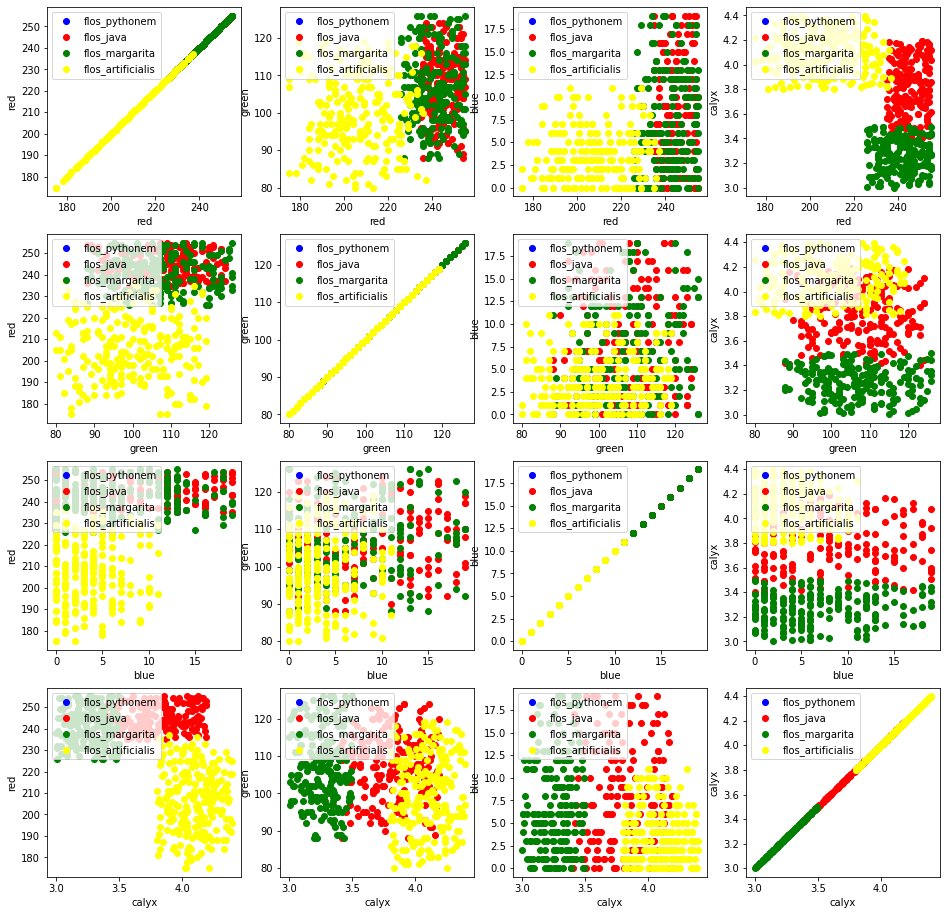

In [ ]:
import matplotlib.pyplot as plt 
target_names = list(flowers.keys()) 
feature_names = ['red', 'green', 'blue', 'calyx'] 
n = 4 
fig, ax = plt.subplots(n, n, figsize=(16, 16)) 
colors = ['blue', 'red', 'green', 'yellow'] 
for x in range(n): 
    for y in range(n): 
        xname = feature_names[x] 
        yname = feature_names[y] 
        for color_ind in range(len(target_names)): 
            ax[x, y].scatter(data[target==color_ind, x], data[target==color_ind, y],
                             label=target_names[color_ind], 
                             c=colors[color_ind]) 
            ax[x, y].set_xlabel(xname) 
            ax[x, y].set_ylabel(yname) 
            ax[x, y].legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt 
import numpy as np 
data, labels = make_blobs(n_samples=1000, #centers=n_classes, 
                          centers=np.array([[2, 3], [4, 5], [7, 9]]), 
                          random_state=1) 
labels = labels.reshape((labels.shape[0],1)) 
all_data = np.concatenate((data, labels), axis=1) 
all_data[:10] 
np.savetxt("squirrels.txt", all_data) 
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

UN EXEMPLE PLUS SIMPLE

In [ ]:
import numpy as np 
a = np.array( [[1, 2], [3, 4]]) 
b = np.array( [5, 6]) 
b = b.reshape((b.shape[0], 1))
print(b)

[[5]
 [6]]


In [ ]:
x = np.concatenate( (a, b), axis=1) 
x

array([[1, 2, 5],
       [3, 4, 6]])

CONVERSION EN DONNEES ET EN ETIQUETTES

In [ ]:
file_data = np.loadtxt("squirrels.txt") 
data = file_data[:,:-1] 
labels = file_data[:,2:] 
labels = labels.reshape((labels.shape[0]))

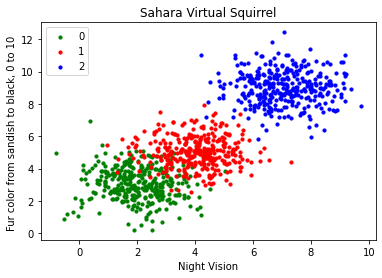

In [ ]:
import matplotlib.pyplot as plt 
colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan') 
n_classes = 3 
fig, ax = plt.subplots() 
for n_class in range(0, n_classes): 
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], c=colours[n_class], s=10, label=str(n_class)) 
    ax.set(xlabel='Night Vision', ylabel='Fur color from sandish to black, 0 to 10 ', title='Sahara Virtual Squirrel')
ax.legend(loc='upper left')

In [ ]:
from sklearn.model_selection import train_test_split 
data_sets = train_test_split(data, 
                             labels, 
                             train_size=0.8, # donnée d'entrainement
                             test_size=0.2, # donnée de test
                             random_state=42 # garantir les meme resultat à chaque exécution
                            ) 
train_data, test_data, train_labels, test_labels = data_sets 

In [ ]:
# importation du model
from sklearn.neighbors import KNeighborsClassifier 
# creation du classifieur 
knn = KNeighborsClassifier(n_neighbors=8) 
# Entrainement
knn.fit(train_data, train_labels) 
# test sur les données: 
calculated_labels = knn.predict(test_data) 
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [ ]:
from sklearn import metrics
#Calcul de la precision
print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))

Accuracy: 0.97


AUTRES DISTRIBUTIONS IMPORTANTES

In [ ]:
import numpy as np
import sklearn.datasets as ds 
data, labels = ds.make_moons(n_samples=150, shuffle=True, noise=0.19, random_state=None) 
data += np.array(-np.ndarray.min(data[:,0]), -np.ndarray.min(data[:,1])) 
np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])

(0.0, 0.40599881270586735)

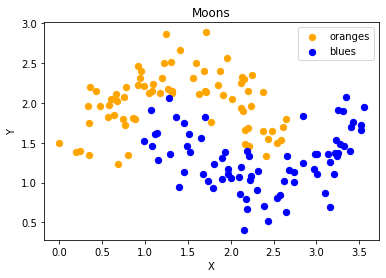

In [ ]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots() 
ax.scatter(data[labels==0, 0], data[labels==0, 1], c='orange', s=40, label='oranges') 
ax.scatter(data[labels==1, 0], data[labels==1, 1], c='blue', s=40, label='blues') 
ax.set(xlabel='X', ylabel='Y', title='Moons')
ax.legend(loc='upper right');

In [ ]:
min_x_new, max_x_new = 33, 88 
min_y_new, max_y_new = 12, 20 
data, labels = ds.make_moons(n_samples=100, shuffle=True, noise=0.05, random_state=None) 
min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1]) #data -= np.array([min_x, 0]) #data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), 1]) #data += np.array([min_x_new, 0])
#data -= np.array([0, min_y]) #data *= np.array([1, (max_y_new - min_y_new) / (max_y - min_y)])
data -= np.array([min_x, min_y]) 
data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), (max_y_new - min_y_new) / (max_y - min_y)]) 
data += np.array([min_x_new, min_y_new])
#np.ndarray.min(data[:,0]), np.ndarray.max(data[:,0]) 
data[:6]

array([[52.95544296, 19.65090341],
       [49.80836461, 17.07587334],
       [51.94318831, 15.4844839 ],
       [67.19079398, 12.45043827],
       [79.93165903, 13.43246368],
       [49.99203317, 15.7200397 ]])

In [ ]:
def scale_data(data, new_limits, inplace=False ): 
    if not inplace: 
        data = data.copy() 
        min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1]) 
        max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1]) 
        min_x_new, max_x_new = new_limits[0] 
        min_y_new, max_y_new = new_limits[1] 
        data -= np.array([min_x, min_y]) 
        data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), (max_y_new - min_y_new) / (max_y - min_y)]) 
        data += np.array([min_x_new, min_y_new]) 
        if inplace: 
            return None 
        else: 
            return data
data, labels = ds.make_moons(n_samples=100, shuffle=True, noise=0.05, random_state=None) 
scale_data(data, [(1, 4), (3, 8)], inplace=True)

In [ ]:
data[:10]

array([[ 0.78233623,  0.60601653],
       [-0.17716561,  1.04578427],
       [ 0.56578133,  0.81977221],
       [-1.02939866,  0.06709155],
       [ 0.73782197, -0.48314164],
       [ 0.0730256 ,  0.18389583],
       [ 0.0276    ,  0.38985146],
       [ 0.25827439, -0.21793529],
       [ 0.91508214,  0.28424377],
       [ 0.18617544,  0.04071811]])

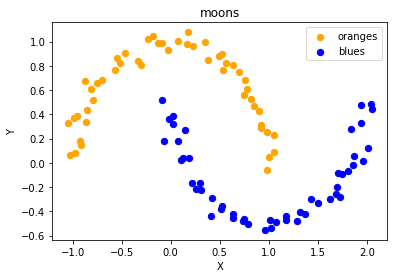

In [ ]:
fig, ax = plt.subplots() 
ax.scatter(data[labels==0, 0], data[labels==0, 1], c='orange', s=40, label='oranges') 
ax.scatter(data[labels==1, 0], data[labels==1, 1], c='blue', s=40, label='blues') 
ax.set(xlabel='X', ylabel='Y', title='moons')
ax.legend(loc='upper right');

In [ ]:
import sklearn.datasets as ds 
data, labels = ds.make_circles(n_samples=100, shuffle=True,noise=0.05, random_state=None)

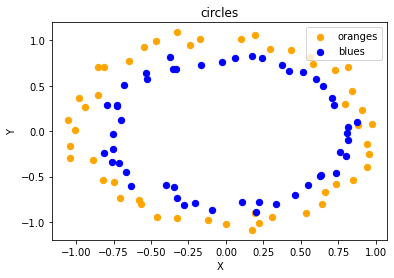

In [ ]:
fig, ax = plt.subplots() 
ax.scatter(data[labels==0, 0], data[labels==0, 1], c='orange', s=40, label='oranges') 
ax.scatter(data[labels==1, 0], data[labels==1, 1], c='blue', s=40, label='blues') 
ax.set(xlabel='X', ylabel='Y', title='circles')
ax.legend(loc='upper right')

Automatically created module for IPython interactive environment


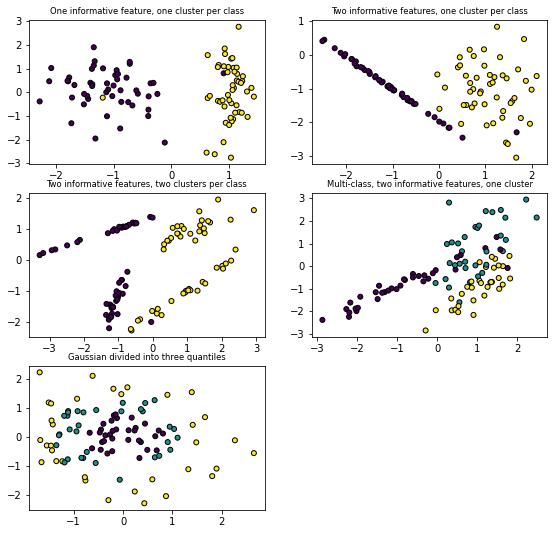

In [ ]:
print(__doc__) 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification 
from sklearn.datasets import make_blobs 
from sklearn.datasets import make_gaussian_quantiles 
plt.figure(figsize=(8, 8)) 
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321) 
plt.title("One informative feature, one cluster per class", fontsize='small') 
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1) 
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k') 
plt.subplot(322) 
plt.title("Two informative features, one cluster per class", fontsize='small') 
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                                                                                             n_clusters_per_class=1) 
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k') 
plt.subplot(323) 
plt.title("Two informative features, two clusters per class", fontsize='small')
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2) 
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k') 
plt.subplot(324) 
plt.title("Multi-class, two informative features, one cluster", fontsize='small') 
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3) 
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.subplot(325) 
plt.title("Gaussian divided into three quantiles", fontsize='small') 
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3) 
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.show()

EXERCICES

CREATION DE 2 DATASET SEPARABLES AVEC UN PERCEPTRON

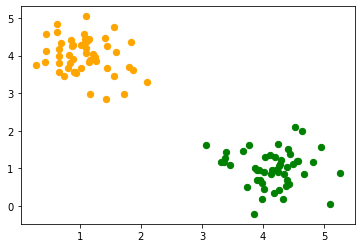

In [ ]:
data, labels = make_blobs(n_samples=100,
cluster_std = 0.5,
centers=[[1, 4] ,[4, 1]],
random_state=1)
fig, ax = plt.subplots()
colours = ["orange", "green"]
label_name = ["Tigers", "Lions"]
for label in range(0, 2):
    ax.scatter(data[labels==label, 0], data[labels==label, 1],
c=colours[label], s=40, label=label_name[label])

CREATION DE DEUX DATASET SEPARABLES NON SEPARABLES AVEC UNE DROITE QUI PASSE PAR L'ORIGINE

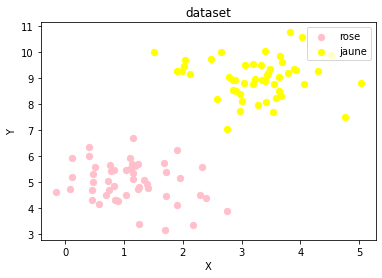

In [ ]:
data, labels = make_blobs(n_samples=100, cluster_std = 0.8, centers=[[1,5] ,[3, 9]], random_state=1) 
fig, ax = plt.subplots() 
colours = ["pink", "yellow"] 
label_name = ["rose", "jaune"] 
for label in range(0, 2):
    ax.scatter(data[labels==label, 0], data[labels==label, 1], c=colours[label], s=40, label=label_name[label])
ax.set(xlabel='X', ylabel='Y', title='dataset')
ax.legend(loc='upper right')

[2 4 4 3 4 4 3 3 2 4 4 2 4 4 3 4 2 4 4 4 4 2 2 4 4 3 2 2 3 2 2 3 2 3 3 3 3
 3 4 3 3 2 3 3 3 2 2 2 2 3 4 4 4 2 4 3 3 2 2 3 4 4 3 3 4 2 4 2 4 3 3 4 2 2
 3 4 4 2 3 2 3 3 4 2 2 2 2 3 2 4 2 2 3 3 4 4 2 2 4 3]


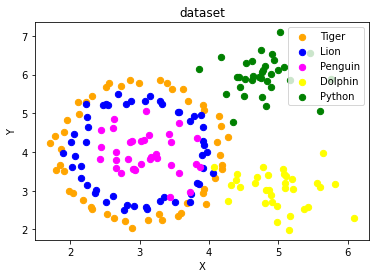

In [ ]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100, shuffle=True, noise=0.05, random_state=42) 
centers = [[3, 4], [5, 3], [4.5, 6]] 
data2, labels2 = make_blobs(n_samples=100, cluster_std = 0.5, centers=centers, random_state=1)
for i in range(len(centers)-1, -1, -1):
    labels2[labels2==0+i] = i+2 
print(labels2) 
labels = np.concatenate([labels, labels2]) 
data = data * [1.2, 1.8] + [3, 4]
data = np.concatenate([data, data2], axis=0)

fig, ax = plt.subplots() 
colours = ["orange", "blue", "magenta", "yellow", "green"] 
label_name = ["Tiger", "Lion", "Penguin", "Dolphin", "Python"] 
for label in range(0, len(centers)+2):
    ax.scatter(data[labels==label, 0], data[labels==label, 1], c=colours[label], s=40, label=label_name[label])
ax.set(xlabel='X', ylabel='Y', title='dataset')
ax.legend(loc='upper right')